# BA-775-B04 A Deep-Dive Into the eCommerce-World!

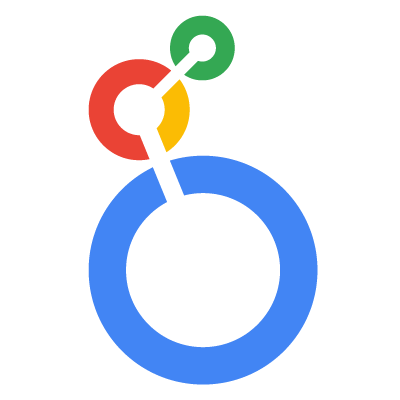

## Problem Definition

**Problem Definition**: theLook is a fictitious eCommerce clothing website that has approached our team with some of its toughest challenges. Its departments are facing issues relating to retaining customers and managing inventory. The upper management of theLook would like a deeper insight into the problems being faced in the organization. In our analysis, we will try to answer various questions, such as:

1. What demographic segments do our customers belong to? What sort of behaviors do they exhibit?

2. What does the inventory turnover rate look like for theLook? Can we uncover why it might be low?

3. What products and product categories are most popular on the website? Should theLook prioritize these to try and improve its inventory turnover?

4. What are revenue and costs looking like for theLook? Is the high level of inventory causing theLook to run at a loss?

5. What does retention rate look like over the past few quarters? Is it improving? Why might it be low?

6. How effective are the supply chain and logistics? Could a poor time to delivery be affecting customer satisfaction and retention rates?

7. Are there any seasonal trends that we can observe in different countries? Can marketing use this trend analysis to boost sales?

**Data source:** BigQuery Public Data. Access [here.](https://console.cloud.google.com/marketplace/product/bigquery-public-data/thelook-ecommerce)

**Motivation:** We believe that businesses making data-driven decisions have a higher chance of success in the eCommerce landscape. We want to offer eCommerce companies a useful template to analyze information and uncover the root cause behind issues they are facing.

## Report Summary


The summary zeroes in on TheLook eCommerce site. It points out a low retention rate, which has nonetheless steadily been improving over the past few years. theLook's Customers are mainly in China, the U.S., and Brazil. Low inventory turnover rates highlight chances to improve, especially with high-turnover items. While total sales go up, poor inventory management leads to losses, specifically in 2020, 2021 and 2022. Key takeaways stress the call for strategic shifts in inventory, customer retention, and cost control for lasting profitability and growth in the tough eCommerce scene.

## Data Dictionary

Linked [Here.](https://docs.google.com/document/d/1YbJXWEhuQY1u6pW5BQ6NVdmdzmPjcqFEjOr7dQ4xuLk/edit?usp=sharing)


## ERD

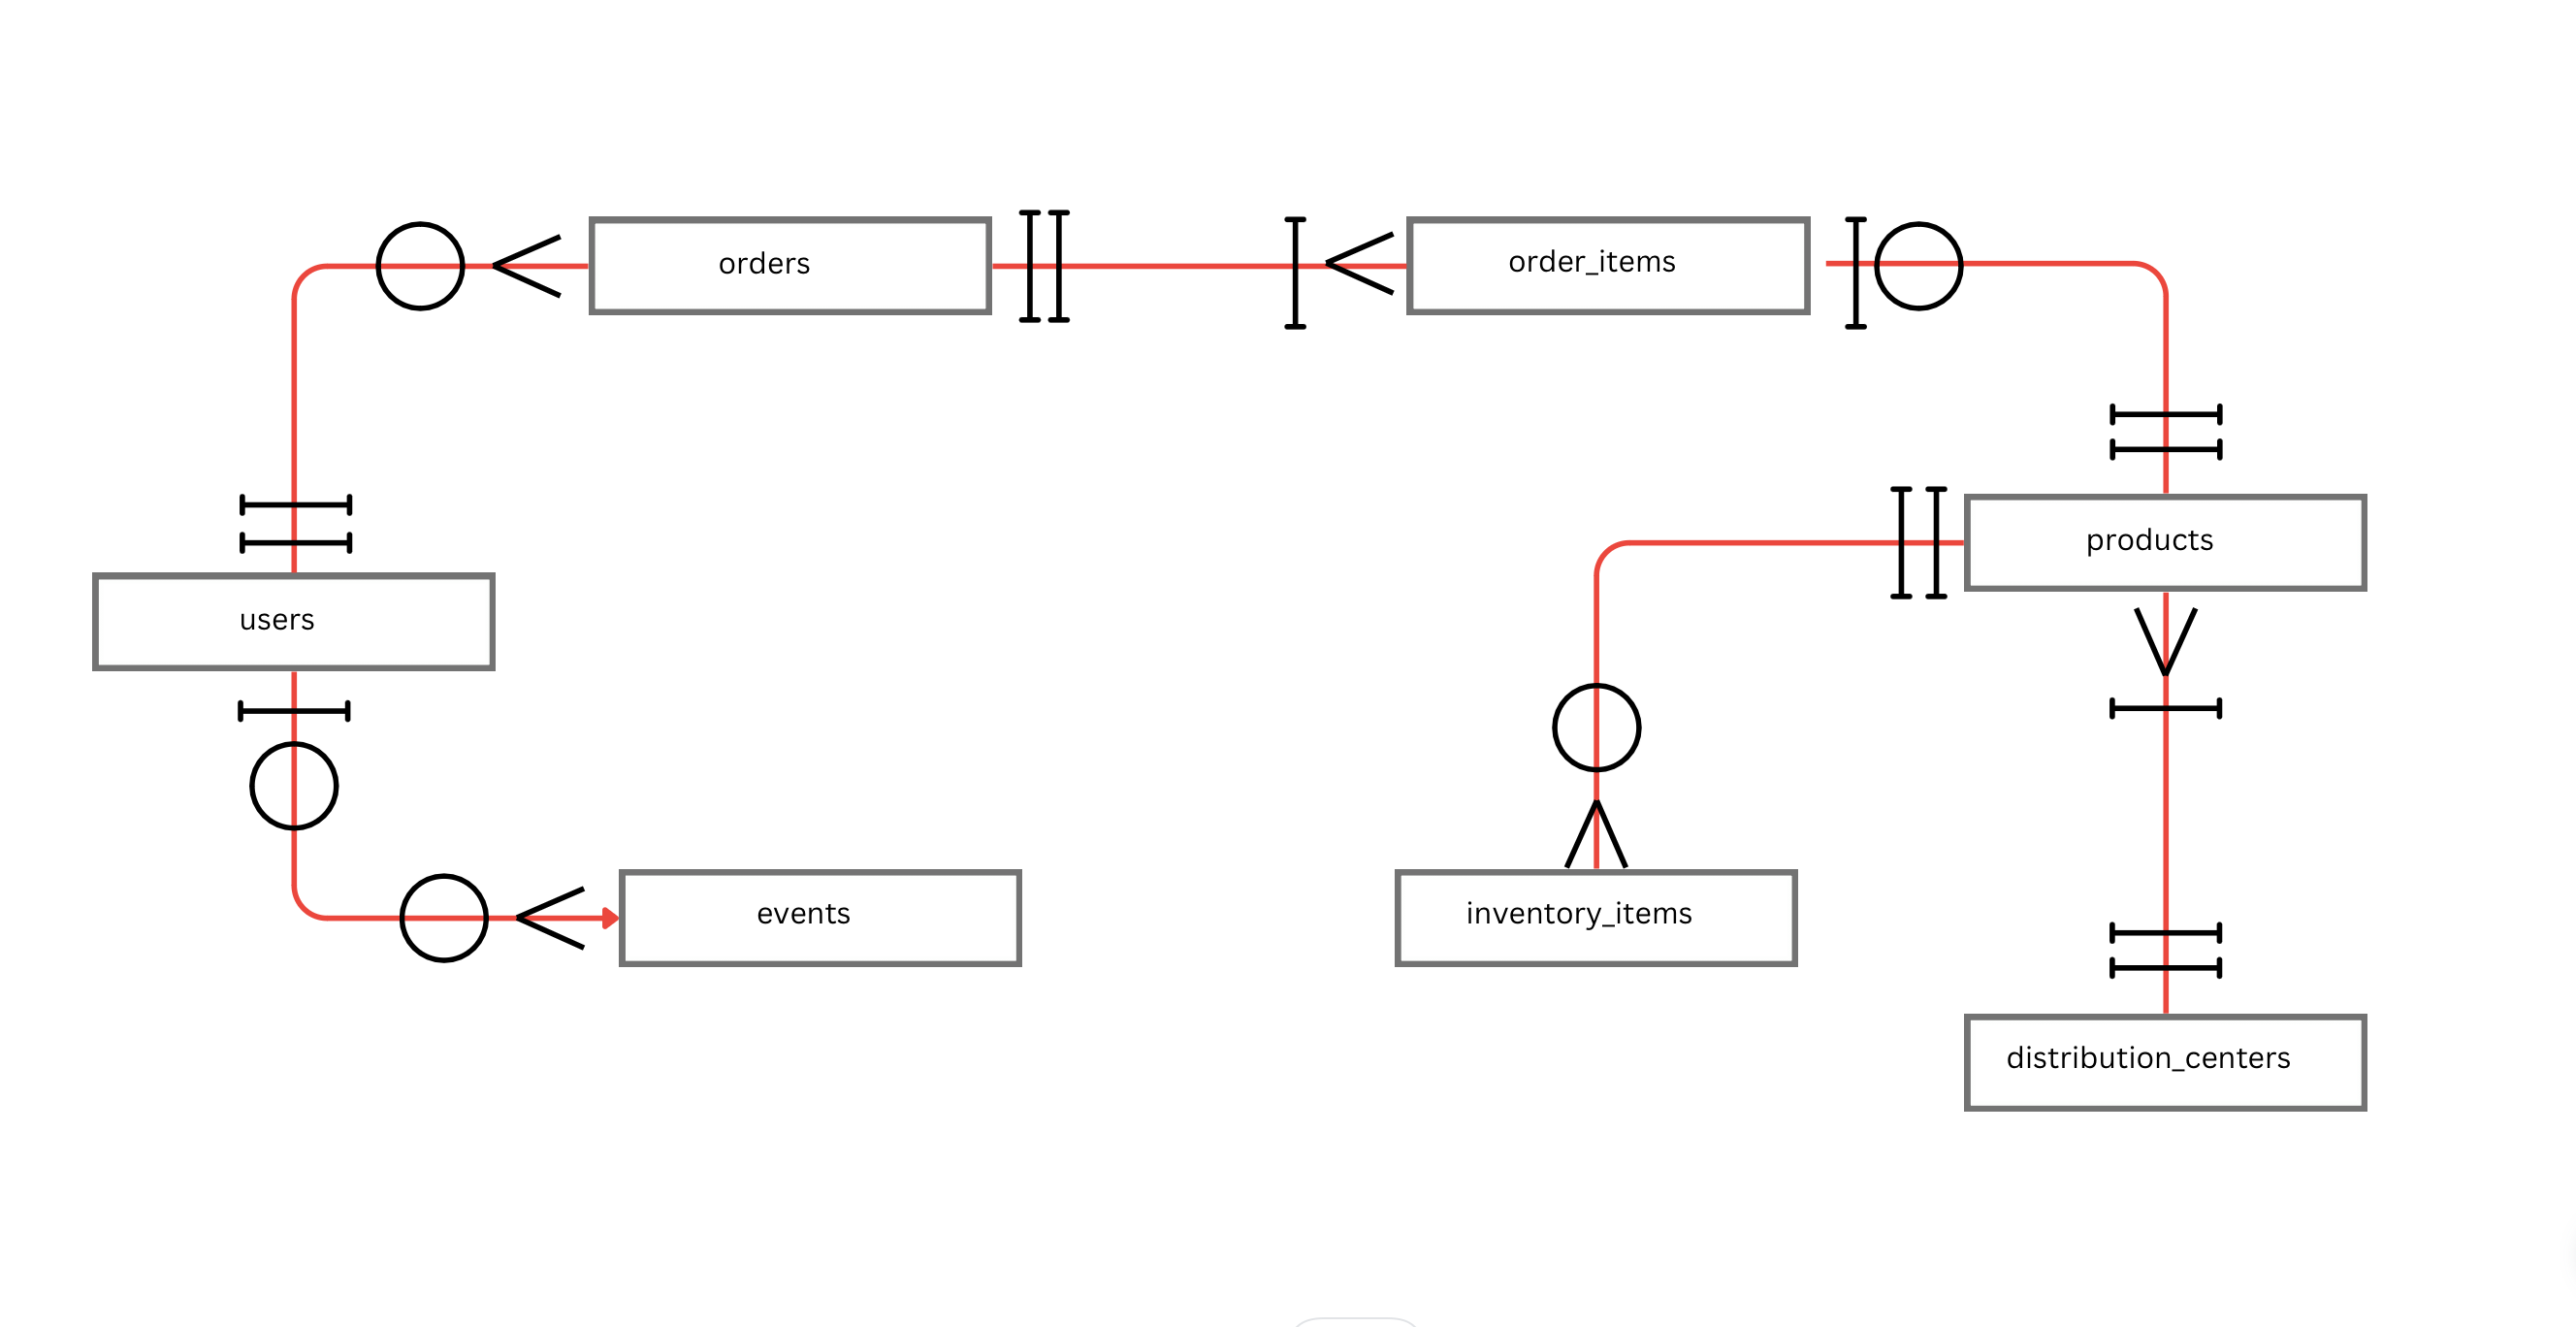

The ERD diagram for theLook including the following:
Entities and Relationships:

Users Table:
Attributes include user_id, names, email, age, etc.
Relationships: Users can be associated with Orders (one-to-many relationship: a user can place multiple orders).

Events Table:
Attributes include event_id, user_id (foreign key to Users), event_type,
Relationships: Events are associated with Users (many-to-one relationship: many events are linked to one user).

Orders Table:
Attributes include order_id, user_id (foreign key to Users), created_at, etc.
Relationships: Orders are associated with Users (many-to-one relationship) and with Order Items (one-to-many relationship)

Order_Items Table:
Attributes include order_id (foreign key to Orders), product_id (foreign key to Products),sale_ price, etc.
Relationships: Order Items associated with Orders (many-to-one relationship) and with Products (many-to-one relationship).

Products Table:
Attributes might include id, name, SKU, etc.
Relationships: Products are associated with Order Items (one-to-many relationship) and with Inventory Items (one-to-one or many-to-one relationship).

Inventory_Items Table:
Attributes include id, product_id (foreign key to Products), product_sku.
Relationships: Inventory Items are associated with Products (one-to-one or many-to-one relationship) and with Distribution Centers (many-to-one relationship).

Distribution_Centers Table:
Attributes might include id, center_name, longitude,latitude.
Relationships: Distribution Centers are associated with Inventory Items (one-to-many relationship).

## Notebook Initiation

In [ ]:
# Install the google.colab.data_table extension
!pip install google-colab

# Load the google.colab.data_table extension
%load_ext google.colab.data_table

# Authenticate with Google Cloud
from google.colab import auth
auth.authenticate_user()

# Set your project ID
project_id = "ba-775-b04"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


## Data Transformation

As some of the tables in our dataset update frequenlty , we have created new filtered tabels for the events, order_items, orders, inventory_items and users tables to stay consistent with our analysis. Below is the code outlined for filtering the tables by date:

In [ ]:
%%bigquery --project $project_id
-- Replacing the 'events' table
CREATE OR REPLACE TABLE `ba-775-b04.theLook.events_112423`
AS
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.events`
WHERE created_at <= '2023-11-24 11:59:59 UTC'

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project $project_id
-- Replacing the 'order_items' table
CREATE OR REPLACE TABLE `ba-775-b04.theLook.order_items_112423`
AS
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.order_items`
WHERE created_at <= '2023-11-24 11:59:59 UTC'

In [ ]:
%%bigquery --project $project_id
-- Replacing the 'orders' table
CREATE OR REPLACE TABLE `ba-775-b04.theLook.order_112423`
AS
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.orders`
WHERE created_at <= '2023-11-24 11:59:59 UTC'

In [ ]:
%%bigquery --project $project_id
-- Replacing the 'inventory_items' table
CREATE OR REPLACE TABLE `ba-775-b04.theLook.inventory_items_112423`
AS
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
WHERE created_at <= '2023-11-24 11:59:59 UTC'

In [ ]:
%%bigquery --project $project_id
-- Replacing the 'users' table
CREATE OR REPLACE TABLE `ba-775-b04.theLook.users_112423`
AS
SELECT *
FROM `bigquery-public-data.thelook_ecommerce.users`
WHERE created_at <= '2023-11-24 11:59:59 UTC'

## Querying theLook Data

### 1. Customer Segmentation

In this section we will segment theLook customers based on the data available to us.

#### 1.1 Demographic Breakdown

##### 1.1.1 Age and Gender

###### 1.1.1.1 What is the gender breakdown of theLook's userbase?

In [ ]:
%%bigquery --project $project_id

-- Number of users by gender

SELECT gender, COUNT(*) AS number
FROM `ba-775-b04.theLook.users_112423`
GROUP BY gender;

Query is running:   0%|          |

Downloading:   0%|          |

,gender,number
0,M,49832
1,F,50168


In terms of the gender breakdown, we see that there is a 50-50 split between the gender base of our fictitious ecommerce store's users. In practice, this is unlikely to be the case. However, this can be an important analysis to perform in order to inform product selection, advertising, social media marketing, and community building initiatives.

###### 1.1.1.2 What is the average age of theLook's user base?

In [ ]:
%%bigquery --project $project_id

-- Calculate Average Age

SELECT AVG(age) AS average_age
FROM `ba-775-b04.theLook.users_112423`;

Query is running:   0%|          |

Downloading:   0%|          |

,average_age
0,40.96324


This is the average age of our customers for the ecommerce store. We note that it is fairly old for an ecommerce store with the caveat that the user base is fictitious. The average age will inform product choices and marketing decisions. For example, it will make a lot less sense to market theLook's offerings on TikTok compared to a typical ecommerce store, which would have a younger user ase.

###### 1.1.1.3 What is the breakdown by ages?

In [ ]:
%%bigquery --project $project_id

-- Number of users by age

SELECT
  CASE
    WHEN age < 18 THEN 'Under 18'
    WHEN age BETWEEN 18 AND 24 THEN '18-24'
    WHEN age BETWEEN 25 AND 34 THEN '25-34'
    WHEN age BETWEEN 35 AND 44 THEN '35-44'
    WHEN age BETWEEN 45 AND 54 THEN '45-54'
    WHEN age BETWEEN 55 AND 64 THEN '55-64'
    ELSE '65 and over'
  END AS age_group,
COUNT(*) AS count
FROM `ba-775-b04.theLook.users_112423`
GROUP BY age_group
ORDER BY
  CASE
    WHEN age_group = 'Under 18' THEN 1
    WHEN age_group = '18-24' THEN 2
    WHEN age_group = '25-34' THEN 3
    WHEN age_group = '35-44' THEN 4
    WHEN age_group = '45-54' THEN 5
    WHEN age_group = '55-64' THEN 6
    ELSE 7
  END;

Query is running:   0%|          |

Downloading:   0%|          |

,age_group,count
0,Under 18,10141
1,18-24,11847
2,25-34,17108
3,35-44,16950
4,45-54,17070
5,55-64,16746
6,65 and over,10138


This is the breakdown of our customers by age ranges. We can see that there is a fairly even split across the age bands. Again, we must caveat this by saying that the user base is fictitious. But the age band can inform product and marketing in the same ways that average age can.

##### 1.1.2 Geographic Breakdown by User Count

###### 1.1.2.1 What is the number of users by country?

In [ ]:
%%bigquery --project $project_id

-- Number of users by country

SELECT country, COUNT(*) AS number
FROM `ba-775-b04.theLook.users_112423`
GROUP BY country
ORDER BY number DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,country,number
0,China,33825
1,United States,22553
2,Brasil,14415
3,South Korea,5415
4,United Kingdom,4647
5,France,4640
6,Germany,4262
7,Spain,4072
8,Japan,2435
9,Australia,2256


As we can see that China, US, and Brasil are the top 3 countries with the most users. Thelook should focus on the those 3 countries to capture more market shares in those countries.

###### 1.1.2.2 What is the number of users in our big 3 countries (US, China, Brasil)?

In [ ]:
%%bigquery --project $project_id

-- Number of users from US, China and Brazil

SELECT COUNT(*) AS number_US_CHN_BRA
FROM `ba-775-b04.theLook.users_112423`
WHERE country = 'United States' OR country = 'China' OR country = 'Brasil';

Query is running:   0%|          |

Downloading:   0%|          |

,number_US_CHN_BRA
0,70793


As we can see from the two code blocks above, most of our user base is from the United States, China, and Brazil. This can be important for an ecommerce business to know so that it can adjust its offerings to its most popular regions. Examples of such adjustments could include increasing cultural relevance in marketing messaging, language consideration, payment methods, and seasonal trends, which we will explore further in our analysis.

###### 1.1.2.3 What is the number of users by state in USA?

In [ ]:
%%bigquery --project $project_id

-- Statewise users United States

SELECT state, COUNT(*) AS number
FROM `ba-775-b04.theLook.users_112423`
WHERE country = 'United States'
GROUP BY state
ORDER BY number DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,state,number
0,California,3633
1,Texas,2545
2,Florida,1689
3,New York,1306
4,Illinois,990
5,Georgia,865
6,North Carolina,761
7,Arizona,757
8,Ohio,632
9,Virginia,620


For the US, we can see that our users are concentrated in the most populous states, and theLook should focus on those states to capture more market shares.

###### 1.1.2.4 What is the number of users by province in China?

In [ ]:
%%bigquery --project $project_id

-- Statewise users China

SELECT state, COUNT(*) AS number
FROM `ba-775-b04.theLook.users_112423`
WHERE country = 'China'
GROUP BY state
ORDER BY number DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,state,number
0,Guangdong,5208
1,Shanghai,2430
2,Zhejiang,2073
3,Beijing,2053
4,Hebei,1986
5,Jiangsu,1838
6,Henan,1368
7,Shandong,1367
8,Fujian,1367
9,Sichuan,1279


For the China, we can see that our users are concentrated in the most populous states, and theLook should focus on those states to capture more market shares.

###### 1.1.2.5 What is the number of users by province in Brasil?

In [ ]:
%%bigquery --project $project_id

-- Statewise users Brasil

SELECT state, COUNT(*) AS number
FROM `ba-775-b04.theLook.users_112423`
WHERE country = 'Brasil'
GROUP BY state
ORDER BY number DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,state,number
0,São Paulo,2134
1,Minas Gerais,1461
2,Bahia,1419
3,Pará,1238
4,Maranhão,1076
5,Ceará,927
6,Rio de Janeiro,890
7,Rio Grande do Sul,631
8,Amazonas,599
9,Pernambuco,587


These are the number of users by state in Brasil.

The analysis by state in our big three countries allows us to further personalize offerings by region. It is also incredibly important to understand this in order to optimize shipping and logistics. For example, theLook only has distribution centers in USA. However, if it planned to expand its distribution centers internationally, this user base by region will prove incredibly useful in determining where to add them.

##### 1.1.3 Geographic Breakdown by Revenue

###### 1.1.3.1 What is the breakdown of sales by US States?

In [ ]:
%%bigquery --project $project_id
--total sales per United States states
SELECT u.state, ROUND(SUM(oi.sale_price),2) AS total_sales
FROM `ba-775-b04.theLook.order_112423` o
JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
WHERE u.country = 'United States'
GROUP BY u.state
ORDER BY total_sales DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,state,total_sales
0,California,386647.70
1,Texas,254417.18
2,Florida,181753.50
3,New York,128987.96
4,Illinois,93369.07
5,Georgia,90083.50
6,North Carolina,77259.83
7,Arizona,65764.98
8,Virginia,64886.89
9,Pennsylvania,63375.44


The dataset displays the total sales amount in various states of the United States. We can observe that the top three states are California, Texas, and Florida, respectively. These states are known for having the largest populations and being economically significant in the United States. This analysis adds another layer of complexity and completeness to the count of users by state.

###### 1.1.3.2 What is the breakdown of sales by Chinese Provinces?

In [ ]:
%%bigquery --project $project_id
--total sales per China provinces
SELECT u.state, ROUND(SUM(oi.sale_price),2) AS total_sales
FROM `ba-775-b04.theLook.order_112423` o
JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
WHERE u.country = 'China'
GROUP BY u.state
ORDER BY total_sales DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,state,total_sales
0,Guangdong,536624.53
1,Shanghai,253887.90
2,Zhejiang,209024.71
3,Beijing,205929.96
4,Hebei,199922.90
5,Jiangsu,186577.83
6,Henan,142981.09
7,Shandong,142303.11
8,Fujian,134251.59
9,Sichuan,134005.27


The dataset displays the total sales amount in various provinces of China. We can observe that the top five provinces are Guangdong, Shanghai, Hebei, Beijing, and Zhejiang, respectively. These five regions are known for having large populations and significant economic contributions in China. This analysis adds another layer of complexity and completeness to the count of users by province.

###### 1.1.3.3 What is the breakdown of sales by Brasilian Provinces?

In [ ]:
%%bigquery --project $project_id
--total sales per Brasilian Province
SELECT u.state, ROUND(SUM(oi.sale_price),2) AS total_sales
FROM `ba-775-b04.theLook.order_112423` o
JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
WHERE u.country = 'Brasil'
GROUP BY u.state
ORDER BY total_sales DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,state,total_sales
0,São Paulo,215257.20
1,Minas Gerais,153999.04
2,Bahia,153851.12
3,Pará,127170.41
4,Maranhão,110891.58
5,Ceará,99230.52
6,Rio de Janeiro,86320.15
7,Rio Grande do Sul,67541.90
8,Pernambuco,64760.31
9,Amazonas,60310.05


The dataset displays the total sales amount in various states of Brazil. We can observe that the top three states are São Paulo, Minas Gerais, and Bahia, respectively. These states are among the most economically important regions in Brazil. This analysis adds another layer of complexity and completeness to the count of users by province.

#### 1.2 Customer Behavior

##### 1.2.1 What are the most common traffic channels?

In [ ]:
%%bigquery --project $project_id
SELECT COUNT(id) AS id_count, traffic_source AS traffic
FROM ba-775-b04.theLook.events_112423
GROUP BY traffic_source
ORDER BY id_count DESC;
##different marketing channels

Query is running:   0%|          |

Downloading:   0%|          |

,id_count,traffic
0,1090926,Email
1,729421,Adwords
2,242730,Facebook
3,240242,YouTube
4,122104,Organic


The traffic channels analysis simply shows which traffic channels customers came from. This can offer eCommerce companies insights into which channels are working well for them and which channels they can potentially invest more in still.

For theLook, we see that most customers are coming in from Email. We can assume that a lot of these emails are reaching out to newer target customers since theLook is facing retention issues. Or we can assume retargeting emails are not working. In any case, emails are a successful avenue for theLook and one they must look to exploit further into in order to optimize customer acquisition and retention.

theLook must also explore Facebook and YouTube retargeting ads as a way of getting customers back to the website. The numbers from there are comparaitvely low at the moment.

##### 1.2.2 What are the monthly trends in the big 3 countries? (US, Brasil, China)

###### 1.2.2.1 USA - Christmas

In [ ]:
%%bigquery --project $project_id

WITH MonthlySales AS (
  SELECT
    EXTRACT(MONTH FROM o.created_at) AS month,
    COUNT(*) AS total_orders,
    SUM(oi.sale_price) AS total_sales
  FROM `ba-775-b04.theLook.order_112423` o
  JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
  LEFT JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
  WHERE EXTRACT(YEAR from o.created_at) <= 2022
    AND EXTRACT(WEEK from o.created_at) <> 0
    AND u.country = 'United States'
  GROUP BY month
  ORDER BY month
)

SELECT
  month,
  total_orders,
  total_sales,
  LAG(total_sales) OVER (ORDER BY month) AS prev_month_sales,
  CASE
    WHEN LAG(total_sales) OVER (ORDER BY month) IS NOT NULL
    THEN (total_sales - LAG(total_sales) OVER (ORDER BY month)) / LAG(total_sales) OVER (ORDER BY month) * 100
    ELSE NULL
  END AS sales_percentage_change
FROM MonthlySales
ORDER BY month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,total_orders,total_sales,prev_month_sales,sales_percentage_change
0,1,1147,69521.800081,NaN,NaN
1,2,1163,70487.830065,69521.800081,1.389535
2,3,1371,79635.940067,70487.830065,12.978283
3,4,1408,86660.480165,79635.940067,8.820816
4,5,1492,87112.830106,86660.480165,0.521979
5,6,1528,89130.810068,87112.830106,2.316513
6,7,1749,98882.200164,89130.810068,10.940538
7,8,1762,107609.380052,98882.200164,8.825835
8,9,1859,110500.170084,107609.380052,2.686374
9,10,1983,114849.300041,110500.170084,3.935858


This set of code analyzes the monthly order quantity and total sales amount in the United States, along with the percentage changes. Both the total orders and total sales amount show consistent month-over-month growth. The sales percentage increase in November and December is 8% and 12%, so this indicates that there is a uptick in purchases around Christmas. eCommerce stores can use such data to inform stocking decisions as well as marketing promotions.

###### 1.2.2.2 Brasil - March

In [ ]:
%%bigquery --project $project_id
WITH MonthlySalesBrasil AS (
  SELECT
    EXTRACT(MONTH FROM o.created_at) AS month,
    COUNT(*) AS total_orders,
    SUM(oi.sale_price) AS total_sales
  FROM `ba-775-b04.theLook.order_112423` o
  JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
  LEFT JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
  WHERE EXTRACT(YEAR FROM o.created_at) <= 2022
    AND EXTRACT(WEEK FROM o.created_at) <> 0
    AND u.country = 'Brasil'
  GROUP BY month
  ORDER BY month
)

SELECT
  month,
  total_orders,
  total_sales,
  LAG(total_sales) OVER (ORDER BY month) AS prev_month_sales,
  CASE
    WHEN LAG(total_sales) OVER (ORDER BY month) IS NOT NULL
    THEN (total_sales - LAG(total_sales) OVER (ORDER BY month)) / NULLIF(LAG(total_sales) OVER (ORDER BY month), 0) * 100
    ELSE NULL
  END AS sales_percentage_change
FROM MonthlySalesBrasil
ORDER BY month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,total_orders,total_sales,prev_month_sales,sales_percentage_change
0,1,703,38191.200053,NaN,NaN
1,2,715,41682.230060,38191.200053,9.140928
2,3,893,55777.580064,41682.230060,33.816209
3,4,894,55009.000072,55777.580064,-1.377937
4,5,1031,61631.610103,55009.000072,12.039139
5,6,988,55821.930095,61631.610103,-9.426462
6,7,1021,59780.890051,55821.930095,7.092123
7,8,1197,71215.740103,59780.890051,19.127935
8,9,1220,71254.550114,71215.740103,0.054496
9,10,1292,78170.640080,71254.550114,9.706173


This set of code analyzes the monthly order quantity and total sales amount in Brazil, along with the percentage changes. The sales percentage increase in March is quite substantial. There is also an uptick around Christmas time similar to the US. This data suggests the presence of seasonal shopping behavior in Brazil. eCommerce stores can use such data to inform stocking decisions as well as marketing promotions.

###### 1.2.3.3 China

In [ ]:
%%bigquery --project $project_id
WITH MonthlySalesChina AS (
  SELECT
    EXTRACT(MONTH FROM o.created_at) AS month,
    COUNT(*) AS total_orders,
    SUM(oi.sale_price) AS total_sales
  FROM `ba-775-b04.theLook.order_112423` o
  JOIN `ba-775-b04.theLook.order_items_112423` oi ON o.order_id = oi.order_id
  LEFT JOIN `ba-775-b04.theLook.users_112423` u ON o.user_id = u.id
  WHERE EXTRACT(YEAR FROM o.created_at) <= 2022
    AND EXTRACT(WEEK FROM o.created_at) <> 0
    AND u.country = 'China'
  GROUP BY month
  ORDER BY month
)

SELECT
  month,
  total_orders,
  total_sales,
  LAG(total_sales) OVER (ORDER BY month) AS prev_month_sales,
  CASE
    WHEN LAG(total_sales) OVER (ORDER BY month) IS NOT NULL
    THEN (total_sales - LAG(total_sales) OVER (ORDER BY month)) / NULLIF(LAG(total_sales) OVER (ORDER BY month), 0) * 100
    ELSE NULL
  END AS sales_percentage_change
FROM MonthlySalesChina
ORDER BY month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,total_orders,total_sales,prev_month_sales,sales_percentage_change
0,1,1865,115928.159973,NaN,NaN
1,2,1874,112913.850087,115928.159973,-2.600153
2,3,2124,133666.750137,112913.850087,18.379411
3,4,2129,121893.380162,133666.750137,-8.808002
4,5,2303,136572.690182,121893.380162,12.042746
5,6,2409,143927.150187,136572.690182,5.385015
6,7,2624,156043.520195,143927.150187,8.418405
7,8,2725,161630.200190,156043.520195,3.580206
8,9,2763,168350.810117,161630.200190,4.158016
9,10,2993,173679.350161,168350.810117,3.165141


This set of code analyzes the monthly order quantity and total sales amount in China, along with the percentage changes. Overall, both the total sales amount and the order quantity show a gradual increase over the year. The sales percentage increases in March, May, and December are quite substantial. This data suggests the presence of seasonal shopping behavior in China. eCommerce stores can use such data to inform stocking decisions as well as marketing promotions.

##### 1.2.3 How many orders do customers make in their lifetime?

In [ ]:
%%bigquery --project $project_id

-- Segmentation (order size analysis)

WITH user_orders AS (
  SELECT
    u.id,
    COUNT(oi.order_id) AS orders
  FROM
    `ba-775-b04.theLook.users_112423` u
  LEFT JOIN
    `ba-775-b04.theLook.order_items_112423` oi
  ON
    u.id = oi.user_id
  GROUP BY
    u.id
)

SELECT
  CASE
    WHEN orders = 0 THEN 'No orders'
    WHEN orders BETWEEN 1 AND 3 THEN '1-3'
    WHEN orders BETWEEN 4 AND 6 THEN '4-6'
    WHEN orders BETWEEN 7 AND 9 THEN '7-9'
    ELSE '10+'
  END AS order_number,
  COUNT(*) AS count
FROM
  user_orders
GROUP BY
  order_number
ORDER BY
  CASE
    WHEN order_number = 'No orders' THEN 1
    WHEN order_number = '1-3' THEN 2
    WHEN order_number = '4-6' THEN 3
    WHEN order_number = '7-9' THEN 4
    WHEN order_number = '10+' THEN 5
    ELSE 6
  END;

Query is running:   0%|          |

Downloading:   0%|          |

,order_number,count
0,No orders,20245
1,1-3,64537
2,4-6,13169
3,7-9,1890
4,10+,159


The table above counts how many time users have ordered within a certain boundary. This helps us understand if users of theLook and eCommerce companies in general are ordering more than once. It can indicate if the customer is satisified with the experience of shopping from the company. In the case of theLook, we see that customers usually end up ordering only between once and three times. This is quite low and should be cause for concern for most companies.

##### 1.2.4 How many users are we retaining per Quarter?

In [ ]:
%%bigquery --project $project_id

WITH user_quarterly_activity AS (
  SELECT
    DATE_TRUNC(created_at, QUARTER) AS order_quarter,
    user_id
  FROM `ba-775-b04.theLook.order_items_112423`
)

SELECT
  previous.order_quarter,
  ROUND(
    COUNT(DISTINCT curr.user_id) /
    GREATEST(COUNT(DISTINCT previous.user_id), 1),
  3) AS retention_rate
FROM user_quarterly_activity AS previous
LEFT JOIN user_quarterly_activity AS curr
ON previous.user_id = curr.user_id
  AND DATE(previous.order_quarter) = DATE_ADD(DATE(curr.order_quarter), INTERVAL 1 QUARTER)
GROUP BY previous.order_quarter
ORDER BY previous.order_quarter

Query is running:   0%|          |

Downloading:   0%|          |

,order_quarter,retention_rate
0,2019-01-01 00:00:00+00:00,0.000
1,2019-04-01 00:00:00+00:00,0.025
2,2019-07-01 00:00:00+00:00,0.030
3,2019-10-01 00:00:00+00:00,0.041
4,2020-01-01 00:00:00+00:00,0.048
5,2020-04-01 00:00:00+00:00,0.061
6,2020-07-01 00:00:00+00:00,0.053
7,2020-10-01 00:00:00+00:00,0.055
8,2021-01-01 00:00:00+00:00,0.062
9,2021-04-01 00:00:00+00:00,0.063


The table above shows the trend of retention rate by quarter since the start of the database. It shows a constantly improving retention rate, which is a sign that any initiatives to retain customers might be working. Alternatively, or concurrently, it is also a consequence of the increasing number of sales that the store is making. For eCommerce stores generally, retention rates should be used to judge customer satisfaction and to benchmark against the industry.

For example, according to Omniconvert, the average retention rate for ecommerce businesses is 30%. TheLook still falls some way short of this in Q4 2023 – 16.8% – and should keep focusing on further retaining customers better.

##### 1.2.5 What is the Customer Lifetime Value?

In [ ]:
%%bigquery --project $project_id

-- CLV =
-- (1) Average Revenue per Customer
-- (2) x Purchase Frequency
-- (3) x Customer Lifespan

WITH customer_spending AS (
SELECT
  user_id,
  EXTRACT(YEAR FROM created_at) AS year,
  EXTRACT(MONTH FROM created_at) AS month,
  ROUND(SUM(sale_price),2) AS monthly_spend_by_customer,
  COUNT(*) AS monthly_number_of_purchases,
FROM `ba-775-b04.theLook.order_items_112423`
GROUP BY user_id, year, month
ORDER BY year, month
),

customer_lifespan AS (
  SELECT
    user_id,
    DATE_DIFF(DATE(MAX(created_at)), DATE(MIN(created_at)), MONTH) AS lifespan_months
  FROM
    `ba-775-b04.theLook.order_items_112423`
  WHERE
    created_at BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
  GROUP BY
    user_id
),

clv_data AS (
SELECT
  ROUND(AVG(monthly_spend_by_customer),2) AS monthly_rev_per_customer,
  ROUND(AVG(monthly_number_of_purchases),2) AS purchase_frequency,
  ROUND(AVG(lifespan_months),2) AS customer_ls,
FROM customer_spending
FULL JOIN customer_lifespan
USING (user_id)
)

SELECT monthly_rev_per_customer, purchase_frequency, customer_ls,
       ROUND(monthly_rev_per_customer * purchase_frequency * customer_ls,2) AS CLV
FROM clv_data;

Query is running:   0%|          |

Downloading:   0%|          |

,monthly_rev_per_customer,purchase_frequency,customer_ls,CLV
0,87.44,1.47,7.96,1023.15


The table above shows the Customer Lifetime Value (CLV). The CLV is calculated using monthly revenue per customer, the average purchase frequency (in months) and average customer timespan (in months). The CLV is important for eCommerce customers since it gives an estimate of how much each customer will spend with store over their lifetime as a customer.

For example, theLook has a CLV of 1,023. This means that the look should be profitable as long as its total cost of acquiring a customer is less than $1,015 (including overheads).

##### 1.2.6 What are the sequence numbers before customers leave the website?

In [ ]:
%%bigquery --project $project_id
WITH MaxSequences AS (
    SELECT session_id, MAX(sequence_number) AS max_sequence
    FROM `ba-775-b04.theLook.events_112423`
    GROUP BY session_id
),
RankedEventTypes AS (
    SELECT
        e.sequence_number,
        e.event_type AS most_common_event_type,
        COUNT(*) AS event_count,
        RANK() OVER (PARTITION BY e.sequence_number ORDER BY COUNT(*) DESC) as rank
    FROM `ba-775-b04.theLook.events_112423` e
    INNER JOIN MaxSequences m ON e.session_id = m.session_id AND e.sequence_number = m.max_sequence
    GROUP BY e.sequence_number, e.event_type
)
SELECT
    m.max_sequence,
    COUNT(*) AS session_count,
    r.most_common_event_type
FROM MaxSequences m
JOIN RankedEventTypes r ON m.max_sequence = r.sequence_number AND r.rank = 1
GROUP BY m.max_sequence, r.most_common_event_type
ORDER BY m.max_sequence;

Query is running:   0%|          |

Downloading:   0%|          |

,max_sequence,session_count,most_common_event_type
0,1,124279,product
1,2,124457,product
2,3,247453,cancel
3,5,81871,purchase
4,6,265,cart
5,7,46524,purchase
6,9,84,cart
7,10,17893,purchase
8,12,129,cart
9,13,23343,purchase


This shows the  sequence numbers of actions before customers leave the website. We can see that most customers leave in the first three sequences. That is to say that they either decide that they do not want to buy the product or that they changed their mind after deciding to purchase (Sequence 3: Cancelations). theLook must investigate the reasons for so many cancellations. Intuitively, it does not make sense that the most common behaviour here is users deciding to cancel their orders.

### 2. Sales and Revenue Analysis

In this section, we will assess theLook's sales and revenue data.

#### 2.1 What are the total sales and revenue over time?

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items

  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products

  ON
    order_items.product_id = products.id
)
#Total sales and revnue over time

SELECT
  EXTRACT(MONTH FROM created_at) AS Month,
  EXTRACT(YEAR FROM created_at) AS Year,
  COUNT(DISTINCT order_id) AS total_sales,
  SUM(joined_data.sale_price) AS total_revenue,
FROM
  joined_data
WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY
  Year, Month
ORDER BY Year, Month


Query is running:   0%|          |

Downloading:   0%|          |

,Month,Year,total_sales,total_revenue
0,1,2019,10,590.800006
1,2,2019,34,2499.810007
2,3,2019,70,5421.279994
3,4,2019,92,7317.260024
4,5,2019,117,8923.400016
5,6,2019,143,10377.400025
6,7,2019,179,13859.240025
7,8,2019,194,17813.640018
8,9,2019,223,19003.720047
9,10,2019,285,21428.770027


This table displays the total sales and total revenue recognized for the year and organized by the month. There is a steady upward growth in sales and revenue from January 2019 to November 2023. Monthly sales and revenue figures exhibit fluctuations, with significant peaks during holiday seasons, particularly in December each year. The year 2023 shows a remarkable surge in both sales and revenue compared to previous years. This is a great insight to retrieve to understand the overall trajectory of the sales and revenue of a company.

#### 2.2 What is the profit over time?

In [ ]:
%%bigquery --project $project_id

SELECT
  COALESCE(c.year, r.year) AS year,
  c.cost,
  r.revenue,
  (r.revenue - c.cost) AS profit
FROM
  (SELECT EXTRACT(YEAR FROM created_at) AS year, SUM(CAST(cost AS float64)) AS cost
   FROM `ba-775-b04.theLook.inventory_items_112423`
   WHERE EXTRACT(YEAR FROM created_at) BETWEEN 2019 AND 2023
   GROUP BY year) c
FULL OUTER JOIN
  (SELECT EXTRACT(YEAR FROM created_at) AS year, SUM(sale_price) AS revenue
   FROM `ba-775-b04.theLook.order_items_112423`
   WHERE EXTRACT(YEAR FROM created_at) BETWEEN 2019 AND 2023
   GROUP BY year) r
ON c.year = r.year
WHERE COALESCE(c.year, r.year) BETWEEN 2019 AND 2023
ORDER BY year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,cost,revenue,profit
0,2019,1.277975e+05,2.235729e+05,9.577545e+04
1,2020,2.648571e+06,7.853905e+05,-1.863181e+06
2,2021,3.047401e+06,1.539230e+06,-1.508171e+06
3,2022,3.643139e+06,2.701181e+06,-9.419585e+05
4,2023,4.536378e+06,4.855075e+06,3.186963e+05


In [ ]:
%%bigquery --project $project_id

SELECT
  COALESCE(c.year, r.year) AS year,
  FORMAT(c.cost, '###,###,###,##0.00') AS cost,
  FORMAT(r.revenue, '###,###,###,##0.00') AS revenue,
  FORMAT(r.revenue - c.cost, '###,###,###,##0.00') AS profit
FROM
  (SELECT EXTRACT(YEAR FROM created_at) AS year, SUM(cost) AS cost
   FROM `ba-775-b04.theLook.inventory_items_112423`
   WHERE EXTRACT(YEAR FROM created_at) BETWEEN 2019 AND 2023
   GROUP BY year) c
FULL OUTER JOIN
  (SELECT EXTRACT(YEAR FROM created_at) AS year, SUM(sale_price) AS revenue
   FROM `ba-775-b04.theLook.order_items_112423`
   WHERE EXTRACT(YEAR FROM created_at) BETWEEN 2019 AND 2023
   GROUP BY year) r
ON c.year = r.year
WHERE COALESCE(c.year, r.year) BETWEEN 2019 AND 2023
ORDER BY year;

Executing query with job ID: 9c078587-b5c3-45fb-a019-d869ad446be2
Query executing: 0.46s


ERROR:
 400 No matching signature for function FORMAT for argument types: FLOAT64, STRING. Supported signature: FORMAT(STRING, [ANY, ...]) at [3:3]

Location: US
Job ID: 9c078587-b5c3-45fb-a019-d869ad446be2



This shows the total revnue, total cost, and total profit for the past four years. Even though the revenue has been growing year after year, but between 2020 and 2022, the profit has been negative. Thelook has already took actions to look into this problem and turned negative profit to postive in 2023.

#### 2.3 What is the revenue by product?

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)

#Revenue by product, category and brand.
SELECT
  name,
  category,
  brand,
  SUM(sale_price) AS total_revenue,
  COUNT(created_at) as num_items_sold
FROM
  joined_data
  WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY

  name, category, brand
ORDER BY total_revenue DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,name,category,brand,total_revenue,num_items_sold
0,Canada Goose Men's The Chateau Jacket,Active,Canada Goose,9780.000000,12
1,Canada Goose Men's The Chateau Jacket,Outerwear & Coats,Canada Goose,8965.000000,11
2,Diesel Men's Lophophora Leather Jacket,Outerwear & Coats,Diesel,8082.000000,9
3,Woolrich Arctic Parka DF,Outerwear & Coats,Woolrich,7920.000000,8
4,Diesel Men's Lisardo Jacket,Outerwear & Coats,Diesel,7580.000000,10
5,The North Face Apex Bionic Soft Shell Jacket -...,Active,The North Face,7224.000000,8
6,True Religion Men's Ricky Straight Jean,Jeans,True Religion,7068.750061,31
7,Nobis Yatesy Parka,Outerwear & Coats,Nobis,6650.000000,7
8,The North Face Apex Bionic Mens Soft Shell Ski...,Outerwear & Coats,The North Face,6321.000000,7
9,The North Face Apex Bionic Soft Shell Jacket -...,Fashion Hoodies & Sweatshirts,The North Face,6321.000000,7


The provided dataset focuses on specific product details, including the name, category, brand, total revenue, and number of items sold. Displayed is the top 10 categories and products within them that are generating the highest revenue for the business. This is an analysis that can be used by any ecommerce company to understand the brands and categories they may invest more money into while providing various levels of granularity.

#### 2.4 What is the revenue by category?

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)


#Total Revenue by category
SELECT
DISTINCT(category) as Category,
  COUNT(created_at) as num_items_sold,
ROUND(SUM(sale_price),0) as total_rev,

FROM joined_data
WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY Category
ORDER BY total_rev DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Category,num_items_sold,total_rev
0,Outerwear & Coats,6626,981774.0
1,Jeans,9469,923691.0
2,Sweaters,8244,627752.0
3,Swim,8406,481255.0
4,Fashion Hoodies & Sweatshirts,8703,475703.0
5,Suits & Sport Coats,3732,475085.0
6,Sleep & Lounge,8354,410775.0
7,Shorts,8261,371560.0
8,Tops & Tees,8897,368939.0
9,Active,6750,348190.0


This shows the number of items sold and total revenue grouped by product categories. As the company is facing problem with profitibility for the past 3 years, they should look into purchasing more merchendise like outwear, jeans to sell and purchasing less in jumpsuits and clothing sets.

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)


#Total Revenue by category
SELECT
DISTINCT(category) as Category,
  COUNT(created_at) as num_items_sold,
ROUND(SUM(sale_price),0) as total_rev,

FROM joined_data
WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY Category
ORDER BY num_items_sold DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Category,num_items_sold,total_rev
0,Intimates,10015,338139.0
1,Jeans,9469,923691.0
2,Tops & Tees,8897,368939.0
3,Fashion Hoodies & Sweatshirts,8703,475703.0
4,Swim,8406,481255.0
5,Sleep & Lounge,8354,410775.0
6,Shorts,8261,371560.0
7,Sweaters,8244,627752.0
8,Accessories,7388,314635.0
9,Active,6750,348190.0


From a granular look into the contribution of each category towards the sales and revenue  we can infer that the top-performing categories are Outerware & Coats and Jeans with the highest revenue. The revenue variability is diverse, leading to infromation on consumer preferences and demand. Dresses and Intimates generate substantial revenue compared to Jumpsuits & Rompers. This table shows us potential market opportunities , through investing in targeted marketing or product development, we could boost sales of lower revenue items.

#### 2.5 What is the revenue by brand?

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)

#Total Revenue by Brand
SELECT
DISTINCT(brand) as Brand,
ROUND(SUM(sale_price),0) as total_rev,
COUNT(created_at) as num_items_sold
FROM joined_data
WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY Brand
ORDER BY total_rev DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,Brand,total_rev,num_items_sold
0,Diesel,158334.0,1149
1,Calvin Klein,146089.0,2316
2,Carhartt,131041.0,1901
3,7 For All Mankind,130991.0,830
4,True Religion,130694.0,655
5,Volcom,89918.0,1535
6,Tommy Hilfiger,84835.0,1203
7,Joe's Jeans,76434.0,505
8,Columbia,75921.0,1132
9,Ray-Ban,74142.0,631


This shows the number of items sold and total revenue grouped by product brand. As the company is facing problem with profitibility for the past 3 years, they should look into purchasing more merchendise like Diesel, Calvin Klein to sell and purchasing less in Canada Goose.

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)

#Total Revenue by Brand
SELECT
DISTINCT(brand) as Brand,
ROUND(SUM(sale_price),0) as total_rev,
COUNT(created_at) as num_items_sold
FROM joined_data
WHERE status = 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY Brand
ORDER BY num_items_sold DESC
LIMIT 20;

Query is running:   0%|          |

Downloading:   0%|          |

,Brand,total_rev,num_items_sold
0,Allegra K,63599.0,4504
1,Calvin Klein,146089.0,2316
2,Carhartt,131041.0,1901
3,Volcom,89918.0,1535
4,Hanes,29254.0,1476
5,Nautica,54733.0,1329
6,Quiksilver,72318.0,1245
7,Levi's,59907.0,1207
8,Tommy Hilfiger,84835.0,1203
9,Diesel,158334.0,1149


Similar to the breakdown of sales and revenue by category, this table provides informations and is grouped by the brand. Diesel and Calvin Klein have the highest in total revenue, with substantial sales for Carhartt, 7 For All Mankind, and True Religion. There is a diverse performance as some brands like The North Face and Canada Goose have lower revenue but potential for premium or specialized markets. Addtionally, these insights can informs inventory management to align product offerings with consumer preferences to enhance overall business performance.

#### 2.6 What is the average order value (AOV) for TheLook over time?

In [ ]:
%%bigquery --project $project_id
#Creating a new table by joining 'order_ietms' table with 'products' based on product_id
WITH joined_data AS (
  SELECT
    order_items.*,
    products.*
  FROM
   ba-775-b04.theLook.order_items_112423 AS order_items
  JOIN
    bigquery-public-data.thelook_ecommerce.products AS products
  ON
    order_items.product_id = products.id
)
#Average order value (AOV) for TheLook over Time
SELECT
--EXTRACT(MONTH FROM created_at) AS Month,
  EXTRACT(YEAR FROM created_at) AS Year,
  AVG(sale_price) AS average_order_value,
FROM
  joined_data
WHERE status= 'Complete' OR status = 'Processing' OR  status = 'Shipped'
GROUP BY
  Year
ORDER BY Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,average_order_value
0,2019,57.159873
1,2020,58.588420
2,2021,60.092832
3,2022,59.593407
4,2023,59.575579


This table illustrates the average order value (AOV) for TheLook over time, showcasing a relatively stable trend. The AOV has seen a modest increase from 2019 to 2023, fluctuating within a narrow range. This could imply that altho9ugh purchasing behaviours have remained similar, the frequency changes throughout the year, leading to sales and revenue fluctuations. Therefore, conentrating on maximizing marketing efforts during these peaks is crucial.

#### 2.7 Sales Growth in B-tier Countries - Where are the opportunities for growth?

We have identified the following countries as ones with high potential to be the next big markets for theLook:

1. United Kingdom
2. South Korea
3. Germany
4. France

##### 2.7.1 What is the total sales in UK and growth rate in the past four years?

In [ ]:
%%bigquery --project $project_id
WITH yearly_sales AS (
  SELECT
    EXTRACT(YEAR FROM oi.created_at) AS Year,
    ROUND(SUM(oi.sale_price), 2) AS total_sales_per_year
  FROM
    ba-775-b04.theLook.order_items_112423 AS oi
  JOIN
    ba-775-b04.theLook.order_112423 AS o ON oi.order_id = o.order_id
  JOIN
    ba-775-b04.theLook.users_112423 AS u ON o.user_id = u.id
  WHERE
    (oi.status = 'Complete' OR oi.status = 'Processing' OR oi.status = 'Shipped')
    AND u.country IN ('United Kingdom')
  GROUP BY
    Year
),
sales_with_growth AS (
  SELECT
    Year,
    total_sales_per_year,
    LAG(total_sales_per_year) OVER (ORDER BY Year) AS prev_year_sales,
    (total_sales_per_year - LAG(total_sales_per_year) OVER (ORDER BY Year)) / LAG(total_sales_per_year) OVER (ORDER BY Year) * 100 AS growth_rate
  FROM
    yearly_sales
)
SELECT
  Year,
  total_sales_per_year,
  ROUND(growth_rate,2) AS growth_rate
FROM
  sales_with_growth
ORDER BY
  Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,total_sales_per_year,growth_rate
0,2019,7012.78,NaN
1,2020,27616.52,293.80
2,2021,52672.94,90.73
3,2022,95322.67,80.97
4,2023,174350.09,82.91


##### 2.7.2 What is the total sales in South Korea and growth rate in the past four years?

In [ ]:
%%bigquery --project $project_id
WITH yearly_sales AS (
  SELECT
    EXTRACT(YEAR FROM oi.created_at) AS Year,
    ROUND(SUM(oi.sale_price), 2) AS total_sales_per_year
  FROM
    ba-775-b04.theLook.order_items_112423 AS oi
  JOIN
    ba-775-b04.theLook.order_112423 AS o ON oi.order_id = o.order_id
  JOIN
    ba-775-b04.theLook.users_112423 AS u ON o.user_id = u.id
  WHERE
    (oi.status = 'Complete' OR oi.status = 'Processing' OR oi.status = 'Shipped')
    AND u.country IN ('South Korea')
  GROUP BY
    Year
),
sales_with_growth AS (
  SELECT
    Year,
    total_sales_per_year,
    LAG(total_sales_per_year) OVER (ORDER BY Year) AS prev_year_sales,
    (total_sales_per_year - LAG(total_sales_per_year) OVER (ORDER BY Year)) / LAG(total_sales_per_year) OVER (ORDER BY Year) * 100 AS growth_rate
  FROM
    yearly_sales
)
SELECT
  Year,
  total_sales_per_year,
  growth_rate
FROM
  sales_with_growth
ORDER BY
  Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,total_sales_per_year,growth_rate
0,2019,6954.13,NaN
1,2020,31590.56,354.27
2,2021,58690.84,85.79
3,2022,118309.04,101.58
4,2023,189682.81,60.33


##### 2.7.3 What is the total sales in Germany and growth rate in the past four years?

In [ ]:
%%bigquery --project $project_id
WITH yearly_sales AS (
  SELECT
    EXTRACT(YEAR FROM oi.created_at) AS Year,
    ROUND(SUM(oi.sale_price), 2) AS total_sales_per_year
  FROM
    ba-775-b04.theLook.order_items_112423 AS oi
  JOIN
    ba-775-b04.theLook.order_112423 AS o ON oi.order_id = o.order_id
  JOIN
    ba-775-b04.theLook.users_112423 AS u ON o.user_id = u.id
  WHERE
    (oi.status = 'Complete' OR oi.status = 'Processing' OR oi.status = 'Shipped')
    AND u.country IN ('Germany')
  GROUP BY
    Year
),
sales_with_growth AS (
  SELECT
    Year,
    total_sales_per_year,
    LAG(total_sales_per_year) OVER (ORDER BY Year) AS prev_year_sales,
    (total_sales_per_year - LAG(total_sales_per_year) OVER (ORDER BY Year)) / LAG(total_sales_per_year) OVER (ORDER BY Year) * 100 AS growth_rate
  FROM
    yearly_sales
)
SELECT
  Year,
  total_sales_per_year,
  ROUND(growth_rate,2) AS growth_rate
FROM
  sales_with_growth
ORDER BY
  Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,total_sales_per_year,growth_rate
0,2019,5121.70,NaN
1,2020,21042.22,310.84
2,2021,50600.55,140.47
3,2022,77605.47,53.37
4,2023,153677.78,98.02


##### 2.7.4 What is the total sales in France and growth rate in the past four years?

In [ ]:
%%bigquery --project $project_id
WITH yearly_sales AS (
  SELECT
    EXTRACT(YEAR FROM oi.created_at) AS Year,
    ROUND(SUM(oi.sale_price), 2) AS total_sales_per_year
  FROM
    ba-775-b04.theLook.order_items_112423 AS oi
  JOIN
    ba-775-b04.theLook.order_112423 AS o ON oi.order_id = o.order_id
  JOIN
    ba-775-b04.theLook.users_112423 AS u ON o.user_id = u.id
  WHERE
    (oi.status = 'Complete' OR oi.status = 'Processing' OR oi.status = 'Shipped')
    AND u.country IN ('France')
  GROUP BY
    Year
),
sales_with_growth AS (
  SELECT
    Year,
    total_sales_per_year,
    LAG(total_sales_per_year) OVER (ORDER BY Year) AS prev_year_sales,
    (total_sales_per_year - LAG(total_sales_per_year) OVER (ORDER BY Year)) / LAG(total_sales_per_year) OVER (ORDER BY Year) * 100 AS growth_rate
  FROM
    yearly_sales
)
SELECT
  Year,
  total_sales_per_year,
  ROUND(growth_rate,2) AS growth_rate
FROM
  sales_with_growth
ORDER BY
  Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,total_sales_per_year,growth_rate
0,2019,6385.71,NaN
1,2020,27354.18,328.37
2,2021,53896.38,97.03
3,2022,92662.19,71.93
4,2023,167438.08,80.70


Analyzing the growth rate for all companies yields no clear winner since the growth rates are similar across the board for all years. However, we see that South Korea has the highest sales in absolute terms ($189k for 2023). It will also be easier to optimize operations for South Korea since it is in the same region as one of our other big three companies. The other European considerations can not compete in this regard.

### 3. Inventory Management

In this section, we will analyze how well theLook is managing inventory.

#### 3.1 What are the inventory turnover rates for TheLook over time?

In [ ]:
%%bigquery --project $project_id

WITH
cogs2019 AS (
    SELECT SUM(cost) AS Total_COGS, '2019' AS Year
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE sold_at BETWEEN '2019-01-01' AND '2019-12-31'
),
Inventory_Start2019 AS (
    SELECT SUM(cost) AS Inventory_Start
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2019-01-01' AND (sold_at IS NULL OR sold_at >= '2019-01-01')
),
Inventory_End2019 AS (
    SELECT SUM(cost) AS Inventory_End
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2020-01-01' AND (sold_at IS NULL OR sold_at >= '2020-01-01')
),
Average_Inventory2019 AS (
    SELECT (Inventory_Start2019.Inventory_Start + Inventory_End2019.Inventory_End) / 2.0 AS Avg_Inventory
    FROM Inventory_Start2019, Inventory_End2019
),
Turnover2019 AS (
  SELECT Cogs2019.Year, ROUND(Cogs2019.Total_COGS / Average_Inventory2019.Avg_Inventory,2) AS Inventory_Turnover_Rate
  FROM Cogs2019, Average_Inventory2019
),

Cogs2020 AS (
    SELECT SUM(cost) AS Total_COGS, '2020' AS Year
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE sold_at BETWEEN '2020-01-01' AND '2020-12-31'
),
Inventory_Start2020 AS (
    SELECT SUM(cost) AS Inventory_Start
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2020-01-01' AND (sold_at IS NULL OR sold_at >= '2020-01-01')
),
Inventory_End2020 AS (
    SELECT SUM(cost) AS Inventory_End
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2021-01-01' AND (sold_at IS NULL OR sold_at >= '2021-01-01')
),
Average_Inventory2020 AS (
    SELECT (Inventory_Start2020.Inventory_Start + Inventory_End2020.Inventory_End) / 2.0 AS Avg_Inventory
    FROM Inventory_Start2020, Inventory_End2020
),
Turnover2020 AS (
  SELECT Cogs2020.Year, ROUND(Cogs2020.Total_COGS / Average_Inventory2020.Avg_Inventory,2) AS Inventory_Turnover_Rate
  FROM Cogs2020, Average_Inventory2020
),

Cogs2021 AS (
    SELECT SUM(cost) AS Total_COGS, '2021' AS Year
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE sold_at BETWEEN '2021-01-01' AND '2021-12-31'
),
Inventory_Start2021 AS (
    SELECT SUM(cost) AS Inventory_Start
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2021-01-01' AND (sold_at IS NULL OR sold_at >= '2021-01-01')
),
Inventory_End2021 AS (
    SELECT SUM(cost) AS Inventory_End
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2022-01-01' AND (sold_at IS NULL OR sold_at >= '2022-01-01')
),
Average_Inventory2021 AS (
    SELECT (Inventory_Start2021.Inventory_Start + Inventory_End2021.Inventory_End) / 2.0 AS Avg_Inventory
    FROM Inventory_Start2021, Inventory_End2021
),
Turnover2021 AS (
  SELECT Cogs2021.Year, ROUND(Cogs2021.Total_COGS / Average_Inventory2021.Avg_Inventory,2) AS Inventory_Turnover_Rate
  FROM Cogs2021, Average_Inventory2021
),

Cogs2022 AS (
    SELECT SUM(cost) AS Total_COGS, '2022' AS Year
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE sold_at BETWEEN '2022-01-01' AND '2022-12-31'
),
Inventory_Start2022 AS (
    SELECT SUM(cost) AS Inventory_Start
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2022-01-01' AND (sold_at IS NULL OR sold_at >= '2022-01-01')
),
Inventory_End2022 AS (
    SELECT SUM(cost) AS Inventory_End
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2023-01-01' AND (sold_at IS NULL OR sold_at >= '2023-01-01')
),
Average_Inventory2022 AS (
    SELECT (Inventory_Start2022.Inventory_Start + Inventory_End2022.Inventory_End) / 2.0 AS Avg_Inventory
    FROM Inventory_Start2022, Inventory_End2022
),
Turnover2022 AS (
  SELECT Cogs2022.Year, ROUND(Cogs2022.Total_COGS / Average_Inventory2022.Avg_Inventory,2) AS Inventory_Turnover_Rate
  FROM Cogs2022, Average_Inventory2022
),

Cogs2023 AS (
    SELECT SUM(cost) AS Total_COGS, '2023Mid' AS Year
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE sold_at BETWEEN '2023-01-01' AND '2023-06-30'
),
Inventory_Start2023 AS (
    SELECT SUM(cost) AS Inventory_Start
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2023-01-01' AND (sold_at IS NULL OR sold_at >= '2023-01-01')
),
Inventory_Mid2023 AS (
    SELECT SUM(cost) AS Inventory_Mid
    FROM `ba-775-b04.theLook.inventory_items_112423`
    WHERE created_at < '2023-07-01' AND (sold_at IS NULL OR sold_at >= '2023-07-01')
),
Average_Inventory2023 AS (
    SELECT (Inventory_Start2023.Inventory_Start + Inventory_Mid2023.Inventory_Mid) / 2.0 AS Avg_Inventory
    FROM Inventory_Start2023, Inventory_Mid2023
),
Turnover2023 AS (
  SELECT Cogs2023.Year, ROUND(Cogs2023.Total_COGS / Average_Inventory2023.Avg_Inventory,2) AS Inventory_Turnover_Rate
  FROM Cogs2023, Average_Inventory2023
)

SELECT Year, Inventory_Turnover_Rate
FROM (
    SELECT Year, Inventory_Turnover_Rate FROM Turnover2019
    UNION ALL
    SELECT Year, Inventory_Turnover_Rate FROM Turnover2020
    UNION ALL
    SELECT Year, Inventory_Turnover_Rate FROM Turnover2021
    UNION ALL
    SELECT Year, Inventory_Turnover_Rate FROM Turnover2022
    UNION ALL
    SELECT Year, Inventory_Turnover_Rate FROM Turnover2023
)
ORDER BY Year ASC;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Inventory_Turnover_Rate
0,2019,9.51
1,2020,0.33
2,2021,0.21
3,2022,0.22
4,2023Mid,0.13


The inventory turnover rates for TheLook exhibit a distinct downward trend from 2019 through the first half of 2023:

- **Year 2019**: The ITR is about 9.51, within the generally accepted a good range of 5 to 10. It indicates that year 2019 had a good balance between having enough stock to meet demand without tying up too much capital in inventory.

- **Year 2020**: There are a sharp decline in ITR to 0.33 suggests a sudden surplus of inventory or a severe drop in sales.

- **Years 2021 and 2022**: The continued low ITRs around 0.22. The issues from 2020 persisted, hinting at there may be inconsistencies with market demand or ineffective inventory management.

- **Year 2023 (First Half)**: The further decrease to an ITR of 0.13, as it implies inventory is moving more slowly than in previous years, increasing the risk of obsolescence and tying up capital.

In summary, theLook need a strategic review of inventory management, demand forecasting, and new adjustments to product offerings to improve the company's inventory turns performance.

#### 3.2 How can we explain the low inventory turnover rate?

##### 3.2.1 What is the percent of items unsold?

In [ ]:
%%bigquery --project $project_id

SELECT
COUNT(created_at) as supplies_bought,
COUNT(sold_at) as items_sold,
ROUND(1 - COUNT (sold_at)/COUNT(created_at),2) as percent_items_not_sold
FROM `ba-775-b04.theLook.inventory_items_112423`

Query is running:   0%|          |

Downloading:   0%|          |

,supplies_bought,items_sold,percent_items_not_sold
0,487332,180207,0.63


Over all years and all categories, there is a very high percentage of items unsold. This explains the high inventory turnover rate in greater detail. theLook has over 63% of its items as unsold. This means it is keeping excess stock for no reason. Over the next few months, theLook should focus on reducing this excess stock by selling it off at a discount to its consumers or other businesses, or giving it away for charitable causes.

##### 3.2.2 What is the percent of items unsold by year?

In [ ]:
%%bigquery --project $project_id

SELECT
  EXTRACT(YEAR FROM created_at) AS year,
  COUNT (created_at) AS supplies_bought,
  COUNT (sold_at) AS items_sold,
  ROUND (1 - COUNT (sold_at)/COUNT(created_at),2) AS percent_items_not_sold
FROM `ba-775-b04.theLook.inventory_items_112423`
GROUP by year
ORDER by year;

Query is running:   0%|          |

Downloading:   0%|          |

,year,supplies_bought,items_sold,percent_items_not_sold
0,2018,21,21,0.00
1,2019,4409,4409,0.00
2,2020,92631,14073,0.85
3,2021,105807,27063,0.74
4,2022,126871,47665,0.62
5,2023,157593,86976,0.45


We can see an explanation for the decrease in turnover rate over the years. More and more supplies are being bought, but the stock is not being sold. The percent of items not sold is improving though. Hopefully, theLook has been investing into improving its demand planning since 2020.

##### 3.2.3 What is the percent of items unsold by category?

In [ ]:
%%bigquery --project $project_id

SELECT
  product_category,
  COUNT (created_at) AS supplies_bought,
  COUNT (sold_at) AS items_sold,
  ROUND (1 - COUNT (sold_at)/COUNT(created_at),2) AS percent_items_not_sold
FROM `ba-775-b04.theLook.inventory_items_112423`
GROUP by product_category
ORDER by percent_items_not_sold;

Query is running:   0%|          |

Downloading:   0%|          |

,product_category,supplies_bought,items_sold,percent_items_not_sold
0,Tops & Tees,32271,11887,0.63
1,Socks & Hosiery,10157,3754,0.63
2,Accessories,26189,9658,0.63
3,Socks,16704,6191,0.63
4,Intimates,36057,13362,0.63
5,Fashion Hoodies & Sweatshirts,31761,11751,0.63
6,Plus,11645,4299,0.63
7,Swim,30444,11259,0.63
8,Outerwear & Coats,24185,8954,0.63
9,Sleep & Lounge,30195,11099,0.63


The percent of items not sold is consistent by category. This is something not to read in to too much. It seems like the fictitious inventory is being updated in a way that ensures theLook has relevent inventory in stock.

### 4. Supply Chain Analysis

In this section, we will analyze theLook's supply chain.

#### 4.1 What are the average times to process and to ship items?

In [ ]:
%%bigquery --project $project_id
SELECT
    ROUND(AVG(DATE_DIFF(shipped_at, created_at, HOUR)),2) AS average_hours_to_process,
    ROUND(AVG(DATE_DIFF(delivered_at, shipped_at, HOUR)),2) AS average_hours_to_ship
FROM
    `ba-775-b04.theLook.order_items_112423`
WHERE
    shipped_at IS NOT NULL AND delivered_at IS NOT NULL;

Query is running:   0%|          |

Downloading:   0%|          |

,average_hours_to_process,average_hours_to_ship
0,12.78,59.2


These values suggest that, on average:
Processing an item takes about 12.78 hours.
Shipping an item takes approximately 59.2 hours.
These durations provide insight into the efficiency of processing and shipping time.

#### 4.2 Returns Analysis

##### 4.2.1 What are the average days to return an item?

In [ ]:
%%bigquery --project $project_id
SELECT
    AVG(DATE_DIFF(returned_at, delivered_at, DAY)) AS average_days_to_return
FROM
    `ba-775-b04.theLook.order_items_112423`
WHERE
    shipped_at IS NOT NULL AND delivered_at IS NOT NULL;

Query is running:   0%|          |

Downloading:   0%|          |

,average_days_to_return
0,1.011666


This table tells us that when a customer makes a return they do so a day after they have received the item. This is a pretty fast return time. theLook should consider this as an indicator of some level of customer dissatisfaction.

##### 4.2.2 What do the returns look like by quarter?

In [ ]:
%%bigquery --project $project_id
SELECT
  EXTRACT (YEAR FROM returned_at) AS return_year,
  EXTRACT (QUARTER FROM returned_at) AS return_quarter,
  COUNT(DISTINCT order_id) AS num_returned_orders,
  AVG(sale_price) AS avg_return_sale_price
FROM
  (SELECT
    oi.order_id,
    oi.user_id,
    oi.product_id,
    oi.inventory_item_id,
    oi.status AS order_status,
    oi.created_at AS order_created_at,
    oi.returned_at,
    oi.sale_price
  FROM
    `ba-775-b04.theLook.order_items_112423` oi
  WHERE
    oi.status = 'Returned'
    )  aa
WHERE EXTRACT (YEAR FROM returned_at) <> 2023
AND EXTRACT (MONTH FROM returned_at) <> 12
GROUP BY
  return_quarter,return_year
ORDER BY
  return_year, return_quarter;

Query is running:   0%|          |

Downloading:   0%|          |

,return_year,return_quarter,num_returned_orders,avg_return_sale_price
0,2019,1,23,41.640000
1,2019,2,44,57.231930
2,2019,3,84,64.604180
3,2019,4,80,61.743241
4,2020,1,160,57.948190
5,2020,2,227,62.000089
6,2020,3,238,60.932356
7,2020,4,183,60.015947
8,2021,1,319,62.067451
9,2021,2,388,58.731029


The result shows the return counts and average sales price each order for each month from 2019 to 2022, which could be useful for time series analysis to show the trend of customer returns monthly and also the trend of how business is going on from year to year.

#### 4.3 How many orders per distribution center?

In [ ]:
%%bigquery --project $project_id
SELECT
  B.product_distribution_center_id,
  COUNT(*) AS order_count
FROM
  ba-775-b04.theLook.order_items_112423 AS A
JOIN
  ba-775-b04.theLook.inventory_items_112423 AS B
ON
  A.inventory_item_id = B.id
GROUP BY
  B.product_distribution_center_id
ORDER BY
  order_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,product_distribution_center_id,order_count
0,1,24276
1,2,23926
2,3,22833
3,8,18217
4,4,17336
5,7,16830
6,9,16653
7,6,16475
8,5,13108
9,10,11934


The following analysis looked at the how many orders per distribution centers and rank them from the most orders to the least orders. As the results shows that the most popular distribution centers are Memphis TN, Chicago IL, Houston Tx. Knowing this would help the inventory management to figure out which distribution centers should stock more product.

### 5. Product Analysis

In this section, we will do analysis on products being sold by theLook.

#### 5.1 What are the best selling products?

In [ ]:
%%bigquery --project $project_id
SELECT
  p.name,
  COUNT(Distinct oi.order_id) AS total_sales_amount
FROM
  `bigquery-public-data.thelook_ecommerce.products` p
JOIN
  `ba-775-b04.theLook.order_items_112423` oi ON p.id = oi.product_id
GROUP BY
  p.name
ORDER BY
  total_sales_amount DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,name,total_sales_amount
0,Wrangler Men's Premium Performance Cowboy Cut ...,56
1,7 For All Mankind Men's Standard Classic Strai...,45
2,True Religion Men's Ricky Straight Jean,37
3,Lucky Brand Mens Men's 361 Vintage Straight De...,36
4,Pearl iZUMi Attack Sock 3-Pack,35
5,Wrangler Men's Rugged Wear Classic Fit Jean,34
6,Wrangler Men's Genuine Tampa Cargo Short,33
7,Bjorn Borg Men's Side Stetch Solid Boxer Brief,32
8,Wrangler Men's Wrancher Dress Jean,32
9,Chaps Big and Tall Solid V-Neck Vest,31


This an analysis for the best selling products, which would help the management to figure out what products are popular and dive deep into the reason why they are so popular for revenue growth. Also, recognizing the best sellers enables better inventory planning. It helps in ensuring that popular products are consistently available. On the other hand, we can also determine what products are not popular and make a decision when restocking them.

#### 5.2 What is the best selling product per category?

In [ ]:
%%bigquery --project $project_id
WITH product_sales_ranked AS (
    SELECT

        P.name AS product_name,
        P.category AS product_category,
        COUNT(O.product_id) AS sales_count,
        ROW_NUMBER() OVER(PARTITION BY P.category ORDER BY COUNT(p.name) DESC) AS rank
    FROM
        bigquery-public-data.thelook_ecommerce.products AS P
    LEFT JOIN
        ba-775-b04.theLook.order_items_112423 AS O ON P.id = O.product_id
    GROUP BY
        p.name, p.category
)

SELECT
    product_name,
    product_category,
    sales_count
FROM
    product_sales_ranked
where rank =1
order by sales_count desc;

Query is running:   0%|          |

Downloading:   0%|          |

,product_name,product_category,sales_count
0,Wrangler Men's Premium Performance Cowboy Cut ...,Jeans,56
1,Wrangler Men's Genuine Tampa Cargo Short,Shorts,33
2,Bjorn Borg Men's Side Stetch Solid Boxer Brief,Underwear,32
3,Chaps Big and Tall Solid V-Neck Vest,Sweaters,31
4,State O Maine Big and Tall Fashion Flannel Pajama,Sleep & Lounge,26
5,Kenneth Cole REACTION Men's Passcase Wallet,Accessories,25
6,Joseph Abboud Men's Two-button Side Vent Sport...,Suits & Sport Coats,23
7,Volcom Men's Vapato Chino Pant,Pants,23
8,Rusty Men's Goombah Too Boardshort,Swim,22
9,Mountain Hardwear Women's Pyxis Hoody,Active,22


Similar to the best selling product analysis, this is a more in-depth analysis look at best selling product in each category. For each category, we will can see which product is popular. Management can use this data to negotiate with suppliers for better terms as we sell them in a high quantity. And the management can run a competitive analysis to understand the market trend.

## Challenges and Conclusions

### Challenges

1. One of the challenges we faced was the nature of our dataset. It is a fictitious dataset that is procedurally generated by Google. This has obvious advantages such as the assured cleanliness of the data. However, it presents challenges that we did not foresee. Due to the nature of the programmed sales, there are patterns that just do not make sense. For example, 63% of the items in inventory have not been sold. This is incredibly high for a normal eCommerce store. However, it is possible that the team behind theLook keeps a very high inventory level so that there are no bugs in the code. An inventory analysis would have been much more interesting if the team behind theLook had thought about this issue for analysts ahead of time.

2. Another challenge that we faced was the daily updates of the dataset. We were working with live data up until the submission of the first assignment. Before submitting that, we saved tables for information up to 24th November. So, we were able to solve that problem, but this means we are missing some available data from the last two weeks.

### Conclusions

Using data, we were able to verify some of theLook's management's concerns about poor inventory management and retention rates:

1. Extremely low inventory turnover rate: After their first year, when theLook had an inventory turnover rate of nearly 10, their inventory turnover rate has been incredibly low, signalling overstocking and inefficiences in their supply chain. As a matter of analysis in the second part of our project, we will assess whether this overstocking is having a negative impact on theLook's Profit and Loss.

2. Struggles in retention rate: theLook's retention rate is low despite its very high growth rate. This could signal that theLook is doing well to attract new customers, but not so good at retaining them.

3. Loss making business: Despite a steady and consistent increase in sales and revenue since 2019, theLook has made a significant loss in a few years. We can place the reason for this loss to the low inventory turnover rate.

We uncovered some other pretty interesting insights from theLook's dataset. A few of these include:

1. Consistently increasing sales: theLook has consistently increased its sales since 2019 (168,000) till now (3,800,000). This is the sign of a business that is performing well on multiple fronts and has cause for optimism for the future.

2. Customer Lifetime Value: The Customer Lifetime Value of theLook is pretty high, which means marketing should have a pretty high budget to attract new customers. Lifetime value can be increased even further by working on the issue of retention.

3. Geographic Concentrations: We uncovered that a lot of theLook's customers come from USA, China, and Brasil. We also concluded that based on sales levels and proximity to China, South Korea should be the next market that theLook aims to make a big mark in.

4. Traffic Channels: We figured out that theLook's website visitors primarily come from Email. This means that the Email Marketing team is performing at a high level. Given the nature of the product (clothing), will it be possible to exploit social media platforms more?

Overall, theLook is performing well in certain aspects, but poorly in others. It could do better with a greater focus on

*   liquidating excess inventory in the short run
*   improving inventory management in the medium long run
*   figuring out why customers are not being retained
*   strategizing retention based on findings
*   localizing marketing and product offerings
*   expanding marketing strategies

## Dashboard

[Dashboard Link 1 (Overview)](https://public.tableau.com/app/profile/jishnu.moorthy/viz/BA775_B04_Dashboard_12/OverviewFloatingOption?publish=yes)

[Dashboard Link 2 (Country Specific)](https://public.tableau.com/app/profile/jishnu.moorthy/viz/BA775_B04_Dashboard_12/Country?publish=yes)

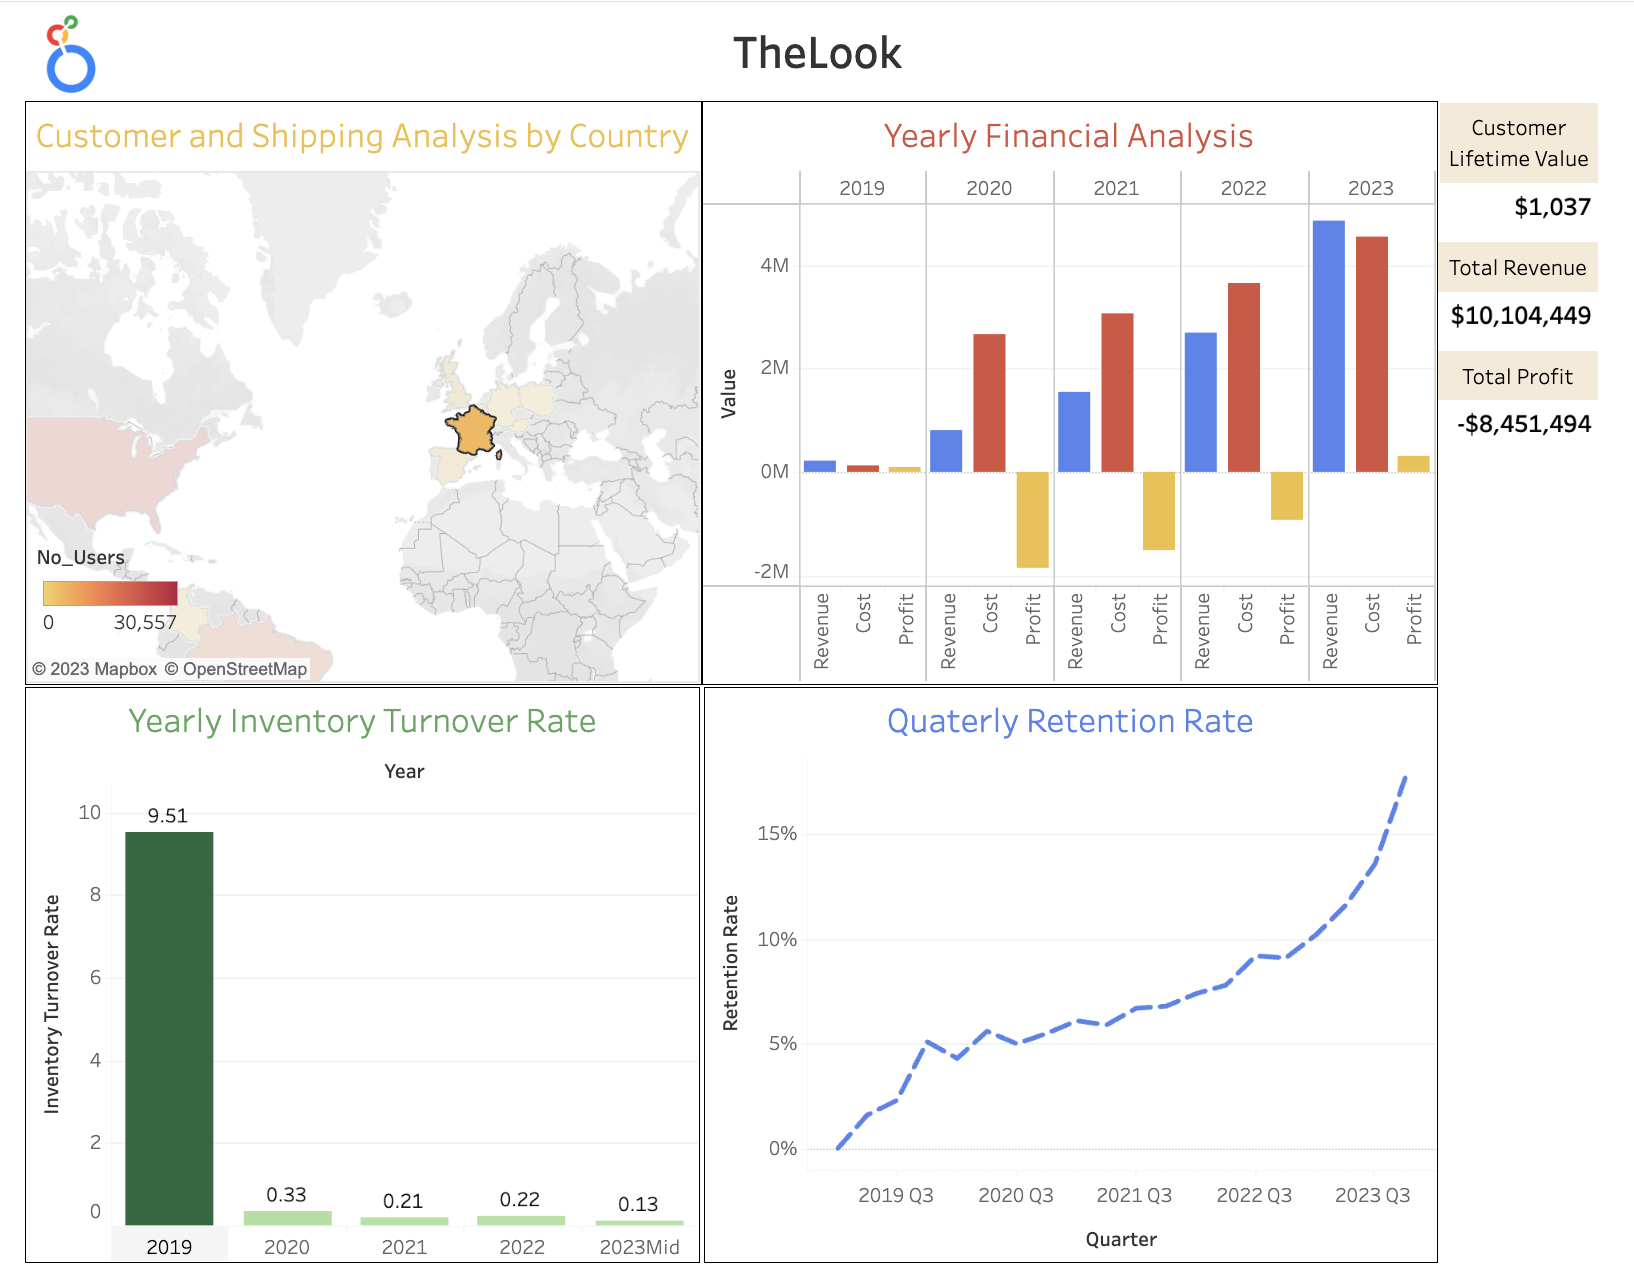

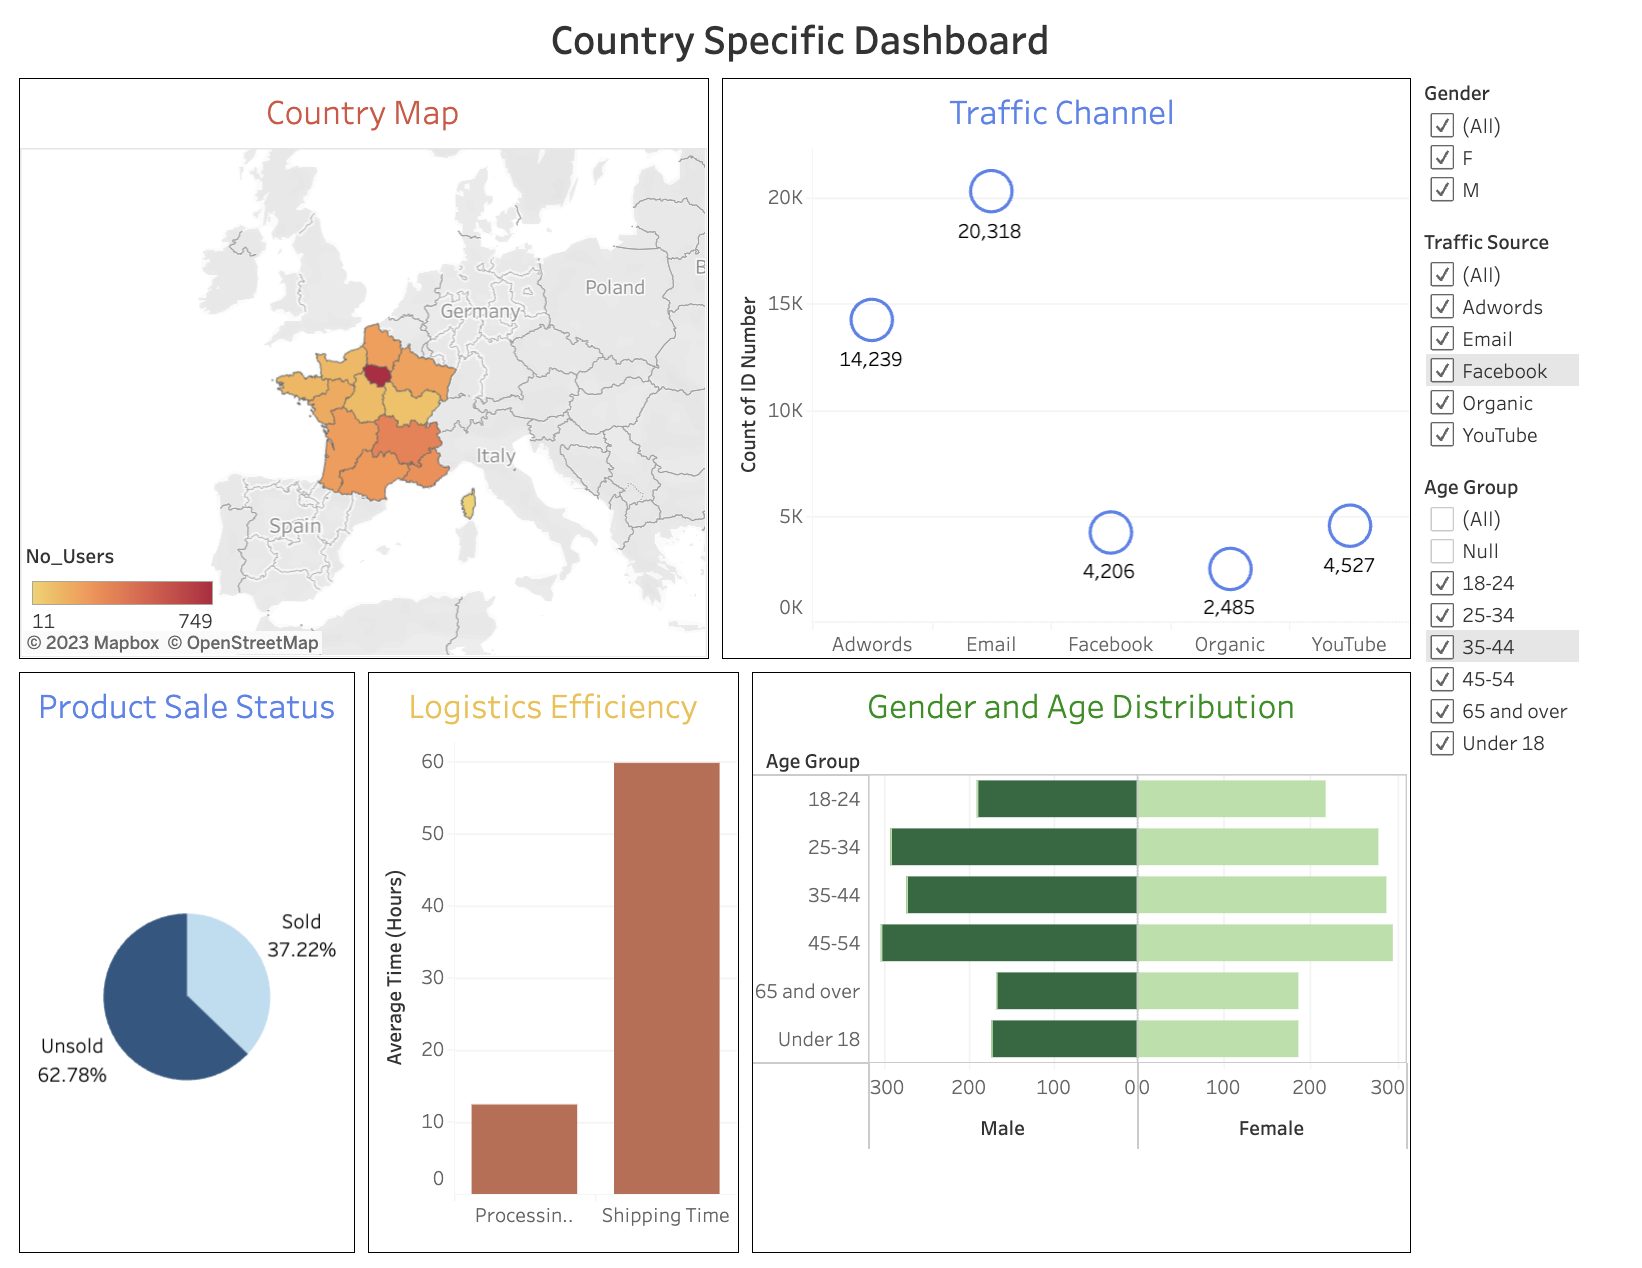